In [6]:
import joblib
import numpy as np
from uncertainties import ufloat, unumpy
import hist 
from hist import Hist
import logging
import atlas_mpl_style as ampl
ampl.use_atlas_style(usetex=False)


In [13]:
HistBins = {
    'jet_pt' : np.linspace(500, 2000, 61),
    'jet_eta' : np.linspace(-2.5, 2.5, 51), 
    'jet_nTracks' : np.linspace(0, 60, 61),
    'jet_trackWidth' : np.linspace(0, 0.4, 61),
    'jet_trackC1' : np.linspace(0, 0.4, 61),
    'jet_trackBDT' : np.linspace(-1.0, 1.0, 101),
    'GBDT_newScore' : np.linspace(-5.0, 5.0, 101),
}

label_pt_bin = [500, 600, 800, 1000, 1200, 1500, 2000]


In [3]:
Extraction_Results_path = '/global/cfs/projectdirs/atlas/hrzhao/HEP_Repo/QG_Calibration/NewWorkflow/trained_lightGBM_new/nominal/plots/ADE/Extraction_Results/none_Extraction_Results.pkl'

Extraction_Results = joblib.load(Extraction_Results_path)

In [10]:
Extraction_Results['jet_pt'][500]['f']

array([[0.56871799, 0.43128201],
       [0.43457923, 0.56542077]])

In [12]:
Extraction_Results['jet_eta'][500]['f']

array([[0.56871799, 0.43128201],
       [0.43457923, 0.56542077]])

In [15]:
fraction_pt_slices = []
for pt in label_pt_bin[:-1]:
    fraction_pt_slices.append(Extraction_Results['jet_pt'][pt]['f'])

In [16]:
fraction_pt_slices = np.array(fraction_pt_slices)

In [17]:
fraction_pt_slices.shape

(6, 2, 2)

In [20]:
fraction_pt_slices[0]

array([[0.56871799, 0.43128201],
       [0.43457923, 0.56542077]])

In [24]:
fractions = fraction_pt_slices.reshape((6, 4)).swapaxes(0,1)

In [25]:
frac_Forward_Quark = fractions[0, :]
frac_Forward_Gluon = fractions[1, :]
frac_Central_Quark = fractions[2, :]
frac_Central_Gluon = fractions[3, :]

In [26]:
frac_Forward_Quark

array([0.56871799, 0.61624311, 0.65938106, 0.6940213 , 0.72727227,
       0.77213681])

Text(0, 0.5, 'Fraction')

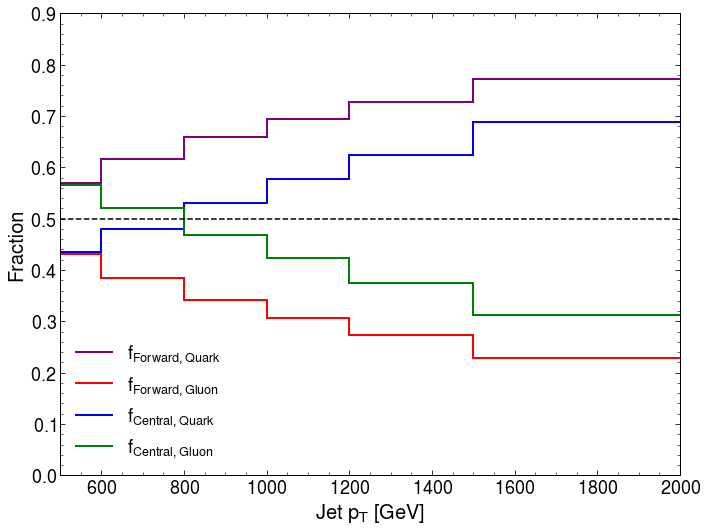

In [39]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots()
bin_edges = label_pt_bin
ax.stairs(frac_Forward_Quark, bin_edges, label=r"$f_{Forward, Quark}$", color="purple", baseline=None, linewidth = 2)
ax.stairs(frac_Forward_Gluon, bin_edges, label=r"$f_{Forward, Gluon}$", color="red", baseline=None, linewidth = 2)
ax.stairs(frac_Central_Quark, bin_edges, label=r"$f_{Central, Quark}$", color="blue", baseline=None, linewidth = 2)
ax.stairs(frac_Central_Gluon, bin_edges, label=r"$f_{Central, Gluon}$", color="green", baseline=None, linewidth = 2)
ax.legend()

ax.hlines(y=0.5, xmin=bin_edges[0], xmax=bin_edges[-1], linestyles='dashed', color="black")
ax.set_xlim(bin_edges[0], bin_edges[-1])
ax.set_xlabel('Jet $p_{\mathrm{T}}$ [GeV]')
ax.set_ylabel('Fraction') 
# ampl.draw_atlas_label(0.1, 0.9, ax=ax, energy="13 TeV", simulation=True)

In [29]:
HistBins['jet_pt']

array([ 500.,  525.,  550.,  575.,  600.,  625.,  650.,  675.,  700.,
        725.,  750.,  775.,  800.,  825.,  850.,  875.,  900.,  925.,
        950.,  975., 1000., 1025., 1050., 1075., 1100., 1125., 1150.,
       1175., 1200., 1225., 1250., 1275., 1300., 1325., 1350., 1375.,
       1400., 1425., 1450., 1475., 1500., 1525., 1550., 1575., 1600.,
       1625., 1650., 1675., 1700., 1725., 1750., 1775., 1800., 1825.,
       1850., 1875., 1900., 1925., 1950., 1975., 2000.])